In [31]:
import pandas as pd
import glob
import os

# Input folder
data_folder = 'Data/'
csv_files = glob.glob(os.path.join(data_folder, 'Participant_*.csv'))

# Define body locations and acceleration axes
body_locations = ['Left_pocket', 'Right_pocket', 'Wrist', 'Upper_arm', 'Belt']
accel_axes = ['Ax', 'Ay', 'Az']

# List to hold all cleaned DataFrames
all_data = []

for file_path in csv_files:
    with open(file_path, 'r') as f:
        line1 = f.readline().strip().split(',')
        line2 = f.readline().strip().split(',')

    # Combine the two header rows
    header = []
    current_prefix = None
    for part1, part2 in zip(line1, line2):
        if part1:
            current_prefix = part1.strip()
        if part2:
            header.append(f"{current_prefix}_{part2.strip()}")
        else:
            header.append("")

    # Read actual data
    df = pd.read_csv(file_path, skiprows=2, header=None)
    df.columns = header

    # Extract participant ID from filename
    participant_id = int(os.path.basename(file_path).split('_')[1].split('.')[0])

    # Get activity from column index 69 (only once — it's global per row)
    if df.shape[1] > 69:
        activity_col = df.iloc[:, 69].values
    else:
        activity_col = ['unknown'] * len(df)

    # Process each position
    for loc in body_locations:
        cols = [f"{loc}_{axis}" for axis in accel_axes if f"{loc}_{axis}" in df.columns]

        if not cols:
            continue

        temp_df = df[cols].copy()
        temp_df.columns = accel_axes
        temp_df['position'] = loc
        temp_df['participant'] = participant_id
        temp_df['activity'] = activity_col

        all_data.append(temp_df)

# Combine everything
combined_df = pd.concat(all_data, ignore_index=True)

# Save
combined_df.to_csv('combined_accel_with_activity.csv', index=False)

# Print summary
print(combined_df.sample(5))
print(f"\n Total rows combined: {combined_df.shape[0]}")
print(f" Output saved as: combined_accel_with_activity.csv")




             Ax        Ay       Az      position  participant  activity
1305467  5.6116  -8.51270 -0.76274   Left_pocket            4  upstairs
2361336  6.0747  -1.85240 -7.61380         Wrist            7   sitting
731513   9.7113  -6.37430 -5.84310  Right_pocket            2    biking
2944730  3.8001 -10.91000 -3.13270  Right_pocket            9  upstairs
2933913  8.1450   0.23155 -5.57070  Right_pocket            9   sitting

 Total rows combined: 3150000
 Output saved as: combined_accel_with_activity.csv


In [38]:
# Reading the combined data
# Load the preprocessed data
combined_df = pd.read_csv('Data/combined_accel_with_activity.csv')
combined_df.head()

,time_stamp,Ax,Ay,Az,position,participant,activity
0,1.390000e+12,-1.81150,-14.873,-1.34840,Left_pocket,1,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,Left_pocket,1,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,Left_pocket,1,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,Left_pocket,1,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,Left_pocket,1,walking


In [39]:
all_df_axis = combined_df[['time_stamp','Ax','Ay','Az','participant','position', 'activity']].copy()
# Convert to numpy array
all_df_axis['activity'].unique()

array(['walking', 'standing', 'jogging', 'sitting', 'biking', 'upstairs',
       'downstairs', 'upsatirs'], dtype=object)

In [40]:
all_df_axis.loc[all_df_axis['activity'] == 'upsatirs', 'activity'] = 'upstairs'
all_df_axis.sample(5)

,time_stamp,Ax,Ay,Az,participant,position,activity
145739,1.390000e+12,5.33920,3.8137,3.82730,1,Wrist,jogging
299774,1.390000e+12,10.06500,-1.4301,-2.22010,1,Belt,upstairs
2090856,1.390000e+12,0.92618,-9.4389,-0.89894,6,Upper_arm,standing
10686,1.390000e+12,0.27241,-10.1200,1.22580,1,Left_pocket,standing
2242885,1.390000e+12,-3.18720,-10.7460,-6.66040,7,Left_pocket,biking


In [41]:
cols_to_numeric = ['Ax', 'Ay', 'Az', 'time_stamp']
for col in cols_to_numeric:
    all_df_axis[col] = pd.to_numeric(all_df_axis[col], errors='coerce')
all_df_axis['participant'] = all_df_axis['participant'].astype('category')
all_df_axis['activity'] = all_df_axis['activity'].astype('category')

In [42]:
all_df_axis.describe()

,time_stamp,Ax,Ay,Az
count,3.150000e+06,3.150000e+06,3.150000e+06,3.150000e+06
mean,1.390000e+12,2.970175e+00,-6.286800e+00,-2.207186e+00
std,0.000000e+00,5.318678e+00,5.467467e+00,3.765335e+00
min,1.390000e+12,-1.960000e+01,-1.966800e+01,-1.949100e+01
25%,1.390000e+12,-8.172200e-02,-9.752200e+00,-4.413000e+00
50%,1.390000e+12,2.506100e+00,-7.150700e+00,-1.661700e+00
75%,1.390000e+12,6.360700e+00,-1.757000e+00,1.089600e-01
max,1.390000e+12,1.960000e+01,1.925900e+01,1.960000e+01


In [43]:
data = all_df_axis.copy()
data

,time_stamp,Ax,Ay,Az,participant,position,activity
0,1.390000e+12,-1.81150,-14.8730,-1.34840,1,Left_pocket,walking
1,1.390000e+12,0.24517,-14.0700,-0.84446,1,Left_pocket,walking
2,1.390000e+12,-0.57205,-14.6280,-1.75700,1,Left_pocket,walking
3,1.390000e+12,-0.69464,-12.9390,-3.09180,1,Left_pocket,walking
4,1.390000e+12,0.87170,-12.0000,-1.56630,1,Left_pocket,walking
...,...,...,...,...,...,...,...
3149995,1.390000e+12,9.05750,-1.9477,-1.28030,9,Belt,downstairs
3149996,1.390000e+12,9.16650,-2.1793,-1.29390,9,Belt,downstairs
3149997,1.390000e+12,10.03800,-3.2144,-1.51190,9,Belt,downstairs
3149998,1.390000e+12,9.62960,-4.2223,-1.70250,9,Belt,downstairs


In [44]:
for i in range(1, len(data['participant'].unique())+1):
    print(f'Participant {i} has {len(data[data["participant"] == i])} rows')

Participant 1 has 315000 rows
Participant 2 has 315000 rows
Participant 3 has 315000 rows
Participant 4 has 315000 rows
Participant 5 has 315000 rows
Participant 6 has 315000 rows
Participant 7 has 315000 rows
Participant 8 has 315000 rows
Participant 9 has 315000 rows
Participant 10 has 315000 rows


In [45]:
import numpy as np
data['accel_magnitude'] = np.sqrt(data['Ax']**2 + data['Ay']**2 + data['Az']**2)

In [46]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [47]:
import numpy as np

def replace_sensor_errors(data, threshold=1000):
    data = np.array(data, dtype=float)
    n = data.shape[0]

    # Find indices where data > threshold
    error_idx = np.where(data > threshold)[0] # to get the actual indices array from the tuple returned by np.where.

    # Handle the first element if it's an error
    if 0 in error_idx:
        valid_idx = np.where(data <= threshold)[0]
        if valid_idx.size == 0:
            raise ValueError("All values in this dataset are errors")
        data[0] = data[valid_idx[0]]

    # For the rest, replace with previous valid value
    for i in error_idx:
        if i == 0:
            continue
        data[i] = data[i-1]

    return data

# Apply only to the accel_magnitude column
data['accel_magnitude'] = replace_sensor_errors(data['accel_magnitude'].values)

In [48]:
# raw data before feature extraction and window building
data['accel_magnitude'].groupby(data['activity']).describe() 


C:\Users\garog\AppData\Local\Temp\ipykernel_452\1947727602.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['accel_magnitude'].groupby(data['activity']).describe()


,count,mean,std,min,25%,50%,75%,max
activity,,,,,,,,
biking,450000.0,10.039184,1.927517,0.921665,9.044184,10.000935,10.950975,30.916655
downstairs,450000.0,10.405523,4.081392,0.268638,7.641863,9.671814,12.538612,31.968675
jogging,450000.0,13.050862,6.521729,0.117166,7.620760,11.966447,19.041573,33.044148
sitting,450000.0,9.756681,0.226904,4.221222,9.652546,9.801582,9.898556,20.934715
standing,450000.0,9.871296,0.283710,3.870511,9.781635,9.890596,9.991227,18.484682
upstairs,450000.0,10.373926,3.151055,0.333906,8.327612,10.048675,12.252458,29.597370
walking,450000.0,10.676270,3.528240,0.288931,8.320685,10.398329,12.661786,31.462008


In [49]:
combined_df.sample(5) # with the other metrics
data.columns
# Group Column is like a time window of 1 second,
# we will leave it out, because we will use a sliding window of 20 seconds.


Index(['time_stamp', 'Ax', 'Ay', 'Az', 'participant', 'position', 'activity',
       'accel_magnitude'],
      dtype='object')

In [51]:
# Keep the essential columns
data_needed = data[['time_stamp','participant','activity','position','accel_magnitude']].copy()

In [52]:
# Save the cleaned and processed data to a new CSV file
output_file_path = 'Data/preprocessed_all_data.csv'
data_needed.to_csv(output_file_path, index=False)

## Creating Time Window
Info:

- window size: 20 sec
- sliding step : 1 sec = 50 Hz
- overlapping windows
- size: 1000samples = 20 seconds * 50 Hz  
- every participant has 63000 samples
- each window does

In [53]:
window_size = 1000   # 20 seconds * 50 Hz
step_size = 50       # 1 second * 50 Hz

participant_1_data = data[data['participant'] == 1].reset_index(drop=True)
windows = []

for start in range(0, len(participant_1_data) - window_size + 1, step_size):
    end = start + window_size
    window = participant_1_data.iloc[start:end]
    windows.append(window)

print(f"Total windows for participant 1: {len(windows)}")

Total windows for participant 1: 6281


# Feature Extraction
for all positions

#### Creating Time Window
Info:

- window size: 20 sec
- sliding step : 1 sec = 50 Hz
- overlapping windows
- size: 1000samples = 20 seconds * 50 Hz  
- every participant has 63000 samples
- each window does

In [54]:
import numpy as np
import pandas as pd

# Load the preprocessed data
data = pd.read_csv('Data/preprocessed_all_data.csv')
data.head()


,time_stamp,participant,activity,position,accel_magnitude
0,1.390000e+12,1,walking,Left_pocket,15.043465
1,1.390000e+12,1,walking,Left_pocket,14.097451
2,1.390000e+12,1,walking,Left_pocket,14.744242
3,1.390000e+12,1,walking,Left_pocket,13.321392
4,1.390000e+12,1,walking,Left_pocket,12.133143


### Overlapping windows with 1-second steps and 20-second window length


In [55]:
# Define window size and step size
window_size = 1000   # 20 seconds * 50 Hz
step_size = 50       # 1 second * 50 Hz

# Initialize a list to hold the windows and their corresponding majority activities
windows = []
activities = []

# Create sliding windows
for start in range(0, len(data) - window_size + 1, step_size):
    end = start + window_size
    window = data.iloc[start:end]
    windows.append(window)
    majority_activity = window['activity'].mode()[0]  # Get the majority activity
    activities.append(majority_activity)

print(f'Total windows created: {len(windows)}')

Total windows created: 62981


In [56]:
# Convert the list of windows and activities into a DataFrame
windowed_data = pd.DataFrame({'window': windows, 'majority_activity': activities})

# Display the first few entries of the windowed data
windowed_data.sample(5)

,window,majority_activity
29714,time_stamp participant activity ...,biking
57430,time_stamp participant activity ...,biking
44047,time_stamp participant activity...,downstairs
18273,time_stamp participant activity pos...,sitting
17999,time_stamp participant activity po...,jogging


In [ ]:
from scipy.stats import skew
from scipy.signal import welch

def extract_features(window, fs=50):
    x = window['accel_magnitude'].values.astype(float)
    features = {}
    features['mean'] = np.mean(x)
    features['std'] = np.std(x)
    features['skewness'] = skew(x)
    features['max'] = np.max(x)
    features['min'] = np.min(x)
    features['range'] = np.max(x) - np.min(x)
    # Welch's method for power spectral density
    f, Pxx = welch(x, fs=fs)
    #https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html
    
    # Μπορείς να κρατήσεις όλο το φάσμα ή π.χ. το άθροισμα ή το μέγιστο
    features['psd_sum'] = np.sum(Pxx)
    features['psd_max'] = np.max(Pxx)
    # Αν θέλεις όλο το φάσμα:
    # for i, val in enumerate(Pxx):
    #     features[f'psd_{i}'] = val
    return features

# Εξαγωγή χαρακτηριστικών για όλα τα παράθυρα
feature_list = []
for window in windows:
    feats = extract_features(window)
    feature_list.append(feats)

features_df = pd.DataFrame(feature_list)
features_df['majority_activity'] = activities
features_df.sample(5)

In [57]:
from scipy.stats import skew
from scipy.signal import welch

def extract_features(window, fs=50):
    x = window['accel_magnitude'].values.astype(float)
    features = {}
    features['mean'] = np.mean(x)
    features['std'] = np.std(x)
    features['skewness'] = skew(x)
    features['max'] = np.max(x)
    features['min'] = np.min(x)
    features['range'] = np.max(x) - np.min(x)
    f, Pxx = welch(x, fs=fs)
    features['psd_sum'] = np.sum(Pxx)
    features['psd_max'] = np.max(Pxx)
    return features

# Helper to extract features for a given position
def extract_features_for_position(windows, activities, position_name):
    feature_list = []
    majority_activities = []
    participants = []
    positions = []
    for window, activity in zip(windows, activities):
        if window['position'].iloc[0] == position_name:
            feats = extract_features(window)
            feature_list.append(feats)
            majority_activities.append(activity)
            participants.append(window['participant'].iloc[0])
            positions.append(position_name)
    features_df = pd.DataFrame(feature_list)
    features_df['majority_activity'] = majority_activities
    features_df['participant'] = participants
    features_df['position'] = positions
    return features_df

# Create features_df for Left_pocket
features_left = extract_features_for_position(windows, activities, 'Left_pocket')
print("Left_pocket features:")
print(features_left.sample(5))

# Create features_df for Right_pocket
features_right = extract_features_for_position(windows, activities, 'Right_pocket')
print("Right_pocket features:")
print(features_right.sample(5))

Left_pocket features:
            mean       std  skewness        max       min      range  \
10652   9.406585  0.040418  0.522838   9.747146  9.240369   0.506776   
12083   9.443964  1.776840 -0.268983  13.428428  4.838649   8.589780   
4658    9.775560  2.101110 -0.137239  15.703103  5.840490   9.862613   
6281   10.912932  4.611188  0.493709  24.141224  1.197590  22.943634   
1965    9.567837  1.859718  0.811304  18.975668  1.983327  16.992341   

          psd_sum    psd_max majority_activity  participant     position  
10652    0.009115   0.000165           sitting            8  Left_pocket  
12083   16.047054   6.987949            biking            9  Left_pocket  
4658    23.740503   9.668355            biking            3  Left_pocket  
6281   107.199175  16.941893        downstairs            4  Left_pocket  
1965     7.473225   1.108382           sitting           10  Left_pocket  
Right_pocket features:
            mean       std  skewness        max       min      range  \


In [58]:
# Ensure 'participant' column exists in features_df before saving

if 'participant' not in features_df.columns:
    # Assign participant to each window based on the original data index
    # Each window is a DataFrame, so get the participant from the first row of each window
    participants = [int(window['participant'].iloc[0]) for window in windows]
    features_df['participant'] = participants

# Save the extracted features to a new CSV file
output_features_file_path = 'Data/features_all_df.csv'
features_df.to_csv(output_features_file_path, index=False)
print(f'Features DataFrame saved to {output_features_file_path}')

Features DataFrame saved to Data/features_all_df.csv


In [59]:
# Save features for Left_pocket
if 'participant' not in features_left.columns:
    participants_left = [int(window['participant'].iloc[0]) for window, activity in zip(windows, activities) if window['position'].iloc[0] == 'Left_pocket']
    features_left['participant'] = participants_left

output_features_left = 'Data/features_left_pocket.csv'
features_left.to_csv(output_features_left, index=False)
print(f'Left_pocket features saved to {output_features_left}')

# Save features for Right_pocket
if 'participant' not in features_right.columns:
    participants_right = [int(window['participant'].iloc[0]) for window, activity in zip(windows, activities) if window['position'].iloc[0] == 'Right_pocket']
    features_right['participant'] = participants_right

output_features_right = 'Data/features_right_pocket.csv'
features_right.to_csv(output_features_right, index=False)
print(f'Right_pocket features saved to {output_features_right}')

Left_pocket features saved to Data/features_left_pocket.csv
Right_pocket features saved to Data/features_right_pocket.csv


In [ ]:


# Adjust the path if your features file has a different name or location
features_path = 'Data/features_all_df.csv'  # Change if needed
features_df = pd.read_csv(features_path)

In [60]:
# Ensure 'participant' and 'majority_activity' columns exist
assert 'participant' in features_df.columns, "Participant column missing!"
assert 'majority_activity' in features_df.columns, "Activity label column missing!"

participants = features_df['participant'].unique()
print(f"Participants found: {participants}")

Participants found: [ 1 10  2  3  4  5  6  7  8  9]


In [61]:
# For Left_pocket features
features_left_path = 'Data/features_left_pocket.csv'
features_left = pd.read_csv(features_left_path)
assert 'participant' in features_left.columns, "Participant column missing in left pocket features!"
assert 'majority_activity' in features_left.columns, "Activity label column missing in left pocket features!"
participants_left = features_left['participant'].unique()
print(f"Participants in Left_pocket: {participants_left}")

# For Right_pocket features
features_right_path = 'Data/features_right_pocket.csv'
features_right = pd.read_csv(features_right_path)
assert 'participant' in features_right.columns, "Participant column missing in right pocket features!"
assert 'majority_activity' in features_right.columns, "Activity label column missing in right pocket features!"
participants_right = features_right['participant'].unique()
print(f"Participants in Right_pocket: {participants_right}")

Participants in Left_pocket: [ 1 10  2  3  4  5  6  7  8  9]
Participants in Right_pocket: [ 1 10  2  3  4  5  6  7  8  9]


### all data with the best MODEL MRWHIIIITE


##### last tasks 

- last grid searches for the best model
- change the test set according to the question 5 and use the best model
- combination of labels for better confusion matrix
-  report
- presentation




(the simplest svm model Mean LOSO SVM Accuracy: 0.658 for all data took 30minutes...... so decide the best of all and just one try)

In [26]:
## question 5
# --- Training the best model: LOSO Cross-Validation Loop with Fixed Random Forest Parameters ---
# Having as training set the data of each participant on position 'Left_pocket'
# and using the position 'Right_pocket' for testing

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Fixed parameters as specified
rf_params = {
    'n_estimators': 150,
    'max_depth': 10,
    'min_samples_split': 5,
    'max_features': 'sqrt',
    'criterion': 'entropy',
    'random_state': 28
}

results = []
feature_importances = []
all_y_true = []
all_y_pred = []

for pid in participants:
    train_df = features_df[features_df['participant'] != pid]
    test_df = features_df[features_df['participant'] == pid]
    
    X_train = train_df.drop(['majority_activity', 'participant'], axis=1)
    y_train = train_df['majority_activity']
    X_test = test_df.drop(['majority_activity', 'participant'], axis=1)
    y_test = test_df['majority_activity']
    
    clf = RandomForestClassifier(**rf_params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Collect for confusion matrix
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results.append({'participant': pid, 'accuracy': acc, 'report': report})
    feature_importances.append(clf.feature_importances_)
    
    print(f"Participant {pid} - Accuracy: {acc:.3f}")

mean_acc = np.mean([r['accuracy'] for r in results])
print(f"\nMean LOSO Accuracy: {mean_acc:.3f}")

Participant 1 - Accuracy: 0.741
Participant 10 - Accuracy: 0.635
Participant 2 - Accuracy: 0.784
Participant 3 - Accuracy: 0.676
Participant 4 - Accuracy: 0.760
Participant 5 - Accuracy: 0.695
Participant 6 - Accuracy: 0.766
Participant 7 - Accuracy: 0.833
Participant 8 - Accuracy: 0.709
Participant 9 - Accuracy: 0.737

Mean LOSO Accuracy: 0.734


## the best selected model -> random forest & SVM 



In [ ]:
features_df

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Load features for left and right pockets
features_left = pd.read_csv('Data/features_left_pocket.csv')
features_right = pd.read_csv('Data/features_right_pocket.csv')

participants = features_left['participant'].unique()

rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 5,
    'max_features': 'sqrt',
    'criterion': 'entropy',
    'random_state': 28
}

results = []
feature_importances = []
all_y_true = []
all_y_pred = []

for pid in participants:
    train_df = features_left[features_left['participant'] == pid]
    test_df = features_right[features_right['participant'] == pid]
    
    if train_df.empty or test_df.empty:
        print(f"Skipping participant {pid}: insufficient data for Left_pocket or Right_pocket.")
        continue
    
    X_train = train_df.drop(['majority_activity', 'participant', 'position'], axis=1)
    y_train = train_df['majority_activity']
    X_test = test_df.drop(['majority_activity', 'participant', 'position'], axis=1)
    y_test = test_df['majority_activity']
    
    clf = RandomForestClassifier(**rf_params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results.append({'participant': pid, 'accuracy': acc, 'report': report})
    feature_importances.append(clf.feature_importances_)
    
    print(f"Participant {pid} - Accuracy: {acc:.3f}")

mean_acc = np.mean([r['accuracy'] for r in results])
print(f"\nMean LOSO Accuracy: {mean_acc:.3f}")

Participant 1 - Accuracy: 0.825
Participant 10 - Accuracy: 0.643
Participant 2 - Accuracy: 0.926
Participant 3 - Accuracy: 0.884
Participant 4 - Accuracy: 0.617
Participant 5 - Accuracy: 0.715
Participant 6 - Accuracy: 0.955
Participant 7 - Accuracy: 0.623
Participant 8 - Accuracy: 0.869
Participant 9 - Accuracy: 0.763

Mean LOSO Accuracy: 0.782


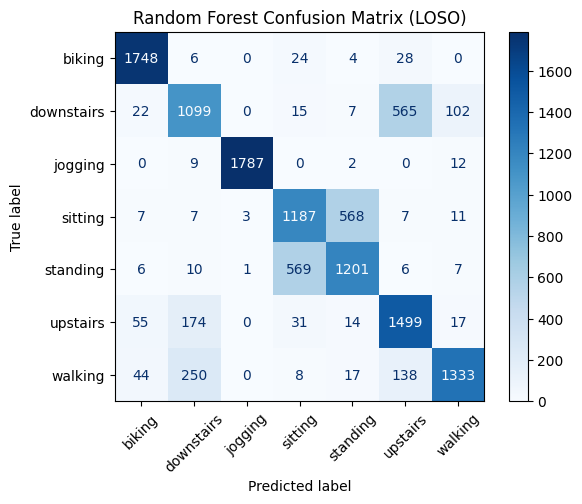

In [63]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
class_names = sorted(features_df['majority_activity'].unique())  
cm = confusion_matrix(all_y_true, all_y_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix (LOSO)")
plt.xticks(rotation=45)
plt.show()

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load features for left and right pockets
features_left = pd.read_csv('Data/features_left_pocket.csv')
features_right = pd.read_csv('Data/features_right_pocket.csv')

participants = features_left['participant'].unique()

svm_params = {'C': 0.1, 'gamma': 0.05,'degree': 2, 'kernel': 'poly'}

results = []
all_y_true = []
all_y_pred = []

for pid in participants:
    train_df = features_left[features_left['participant'] == pid]
    test_df = features_right[features_right['participant'] == pid]
    
    if train_df.empty or test_df.empty:
        print(f"Skipping participant {pid}: insufficient data for Left_pocket or Right_pocket.")
        continue
    
    X_train = train_df.drop(['majority_activity', 'participant', 'position'], axis=1)
    y_train = train_df['majority_activity']
    X_test = test_df.drop(['majority_activity', 'participant', 'position'], axis=1)
    y_test = test_df['majority_activity']
    
    clf = SVC(**svm_params, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results.append({'participant': pid, 'accuracy': acc, 'report': report})
    
    print(f"Participant {pid} - Accuracy: {acc:.3f}")

mean_acc = np.mean([r['accuracy'] for r in results])
print(f"\nMean LOSO SVM Accuracy (Left→Right): {mean_acc:.3f}")

Participant 1 - Accuracy: 0.751
Participant 10 - Accuracy: 0.613
Participant 2 - Accuracy: 0.831
Participant 3 - Accuracy: 0.775
Participant 4 - Accuracy: 0.717
Participant 5 - Accuracy: 0.750
Participant 6 - Accuracy: 0.842
Participant 7 - Accuracy: 0.505
Participant 8 - Accuracy: 0.773
Participant 9 - Accuracy: 0.813

Mean LOSO SVM Accuracy (Left→Right): 0.737


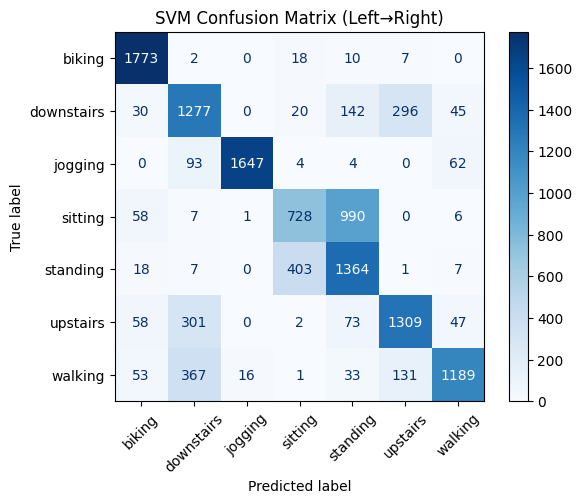

In [66]:
# Plot confusion matrix
class_names = sorted(list(set(all_y_true) | set(all_y_pred)))
cm = confusion_matrix(all_y_true, all_y_pred, labels=class_names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix (Left→Right)")
plt.xticks(rotation=45)
plt.show()